Best learning rate: 0.01, with Mean Squared Error: 3.111248254776001
7/7 [==============================] - 0s 2ms/step


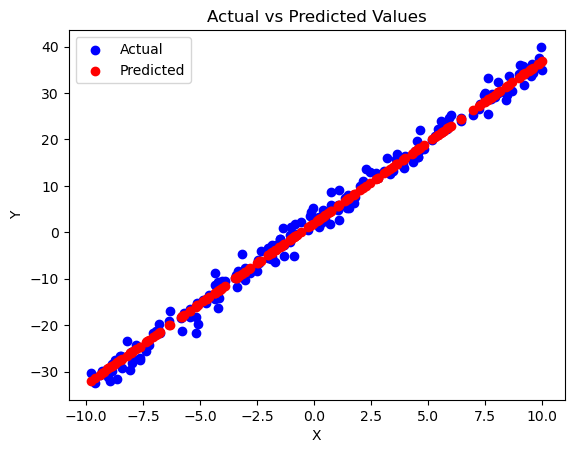

Mean Squared Error on the test set: 3.1162984371185303


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create data
np.random.seed(0)
x = np.random.uniform(-10, 10, 1000)
y = 3.5 * x + 2 + np.random.normal(0, 2, 1000)

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Reshape for TensorFlow
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

learning_rates = [0.1, 0.01, 0.001, 0.0001]  # define the list of learning rates you want to try

best_mse = np.inf  # initialize with infinity
best_lr = 0  # initialize with 0

for lr in learning_rates:
    tf.keras.backend.clear_session()  # clear the previous model
    model = Sequential()
    model.add(Dense(1, input_dim=1))
    optimizer = Adam(learning_rate=lr)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    model.fit(x_train, y_train, epochs=50, verbose=0)
    mse = model.evaluate(x_test, y_test, verbose=0)
    if mse < best_mse:  # if the current model's MSE is lower than the best MSE seen so far
        best_mse = mse  # update the best MSE
        best_lr = lr  # update the learning rate that leads to the best MSE

print(f"Best learning rate: {best_lr}, with Mean Squared Error: {best_mse}")

# Train the model with the best learning rate
model = Sequential()
model.add(Dense(1, input_dim=1))
optimizer = Adam(learning_rate=best_lr)
model.compile(loss='mean_squared_error', optimizer=optimizer)
model.fit(x_train, y_train, epochs=50, verbose=0)

# Evaluate and plot
mse = model.evaluate(x_test, y_test, verbose=0)
y_pred = model.predict(x_test)
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, y_pred, color='red', label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print(f"Mean Squared Error on the test set: {mse}")
